# HopHacks

Created 2021/09/17  
Authors: A.S., P.B., Y.P.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial  import distance as dist 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity as cos_sim

# import nltk as nltk
# nltk.download('punkt')

### Toy Examples

In [2]:
c1 = ["This course is an introduction to stochastic differential equations and applications."
      " Basic topics to be reviewed include Ito and Stratonovich integrals, Ito formula,"
      " SDEs and their integration. The course will focus on diffusion processes and diffusion theory,"
      " with topics include Markov properties, generator, Kolmogrov’s equations (Fokker-Planck equation),"
      " Feynman-Kac formula, the martingale problem, Girsanov theorem, stability and ergodicity."
      " The course will briefly introduce applications, with topics include statistical"
      "inference of SDEs, filtering and control."]


c2= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models. The stochastic models may include classical time-series models, "
     "Markov chains and diffusion models. The basic simulation techniques covered will be"
     " useful in sample-generation of random variables, vectors and stochastic processes,"
     " and as advanced techniques, importance sampling, particle filtering and Bayesian"
     " computation may be discussed."]


c3=  ["The course covers fundamental mathematical ideas for certain approximation"
      "and statistical learning problems in high dimensions. We start with basic approximation"
      "theory in low-dimensions, in particular linear and nonlinear approximation by Fourier "
      "and wavelets in classical smoothness spaces, and discuss applications in imaging,"
      " inverse problems and PDE’s. We then introduce notions of complexity of function spaces,"
      " which will be important in statistical learning. We then move to basic problems in"
      " statistical learning, such as regression and density estimation. The interplay between"
      " randomness and approximation theory is introduced, as well as fundamental tools such as"
      " concentration inequalities, basic random matrix theory, and various estimators are"
      "constructed in detail, in particular multi scale estimators. At all times we consider"
      " the geometric aspects and interpretations, and will discuss concentration of"
      " measure phenomena, embedding of metric spaces, optimal transportation distances,"
      " and their applications to problems in machine learning such as manifold learning "
      "and dictionary learning for signal processing."]
      
c4= ["Data mining is a relatively new term used in the academic and business world, "
     "often associated with the development and quantitative analysis of very large"
     " databases. Its definition covers a wide spectrum of analytic and information "
     "technology topics, such as machine learning, artificial intelligence,"
     " statistical modeling, and efficient database development."
     " This course will review these broad topics, and cover specific analytic"
     " and modeling techniques such as advanced data visualization, decision trees,"
     "neural networks, nearest neighbor, clustering, logistic regression,"
     " and association rules. Although some of the mathematics underlying"
     " these techniques will be discussed, our focus will be on the application "
     "of the techniques to real data and the interpretation of results."
     " Because use of the computer is extremely important when “mining” large amounts of data,"
     "we will make substantial use of data mining software tools to learn "
     "the techniques and analyze datasets."]
     
c5=["By employing fundamental concepts from diverse areas of research,"
    " such as statistics, signal processing, biophysics, biochemistry,"
    " cell biology, and epidemiology, this course introduces a multidisciplinary"
    " and rigorous approach to the modeling and computational analysis of complex "
    "interaction networks. Topics to be covered include: overview of complex nonlinear"
    "interaction networks and their applications, graph-theoretic representations "
    "of network topology and stoichiometry, stochastic modeling of dynamic processes on"
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]


# c6= ["The objective of the course is to survey essential simulation techniques for popular"
#      " stochastic models. The stochastic models may include classical time-series models, "
#      "Markov chains and diffusion models. The basic simulation techniques covered will be"
#      " useful in sample-generation of random variables, vectors and stochastic processes,"
#      " and as advanced techniques, importance sampling, particle filtering and Bayesian"
#      " computation may be discussed."]

c6= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models.  "
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]


c_list=[c1,c2,c3,c4, c5, c6]

N_samples = len(c_list)

#Need a way to do this automatically    
c_all = c1+c2+c3+c4+c5+c6

### Creating Vocabulary and Indexing

In [3]:
vectorizer = CountVectorizer()

In [4]:
vectorizer.fit(c_all)
vocc =vectorizer.vocabulary_

N_voc = len(vocc)

N_voc

267

### Vectorizing the texts

In [5]:
vectorizer.transform(c1).toarray().ravel().shape

(267,)

In [6]:
Vectors = np.zeros([N_samples, N_voc])


for i in range(N_samples):
        
    Vectors[i,:] = vectorizer.transform(c_list[i]).toarray().ravel()

### Similarity

<IPython.core.display.Javascript object>


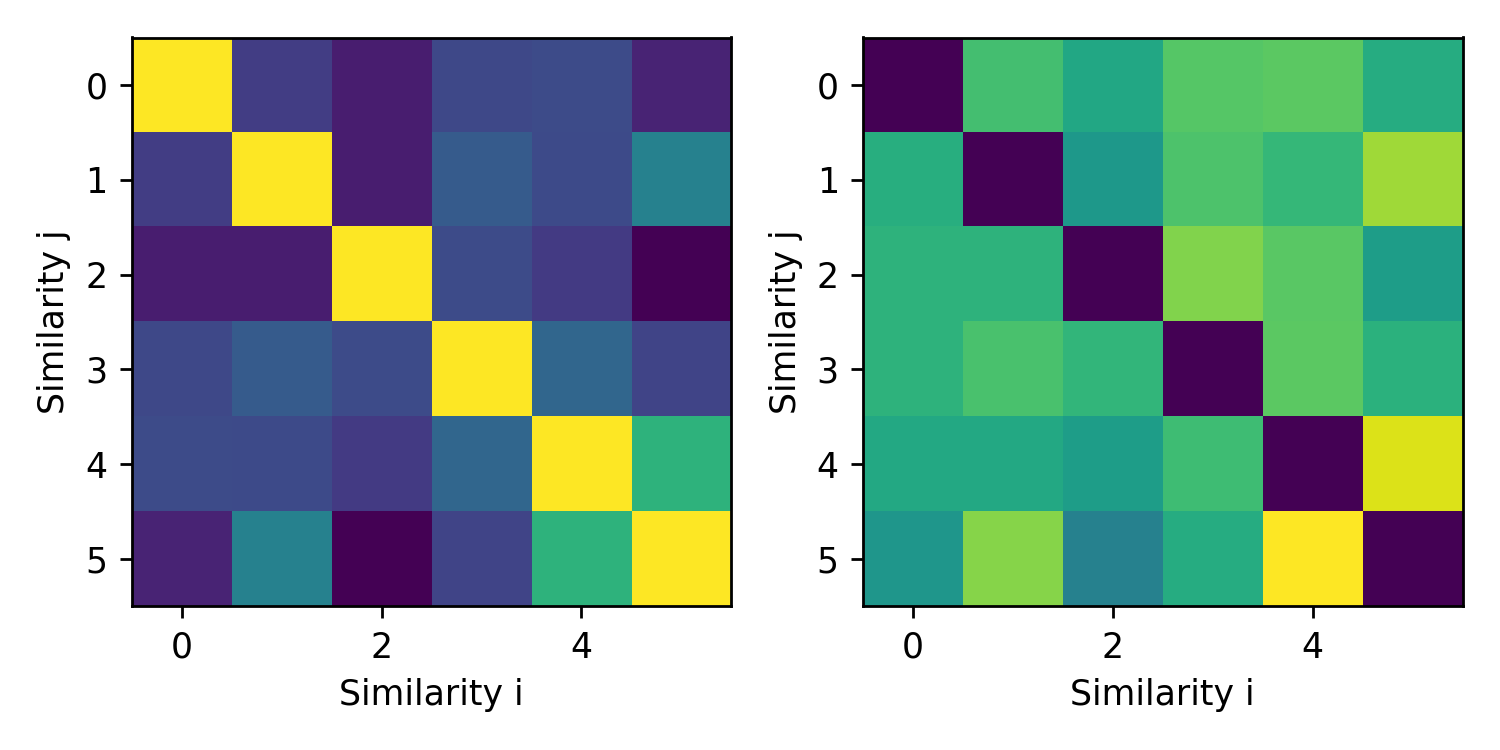

Text(0, 0.5, 'Similarity j')

In [7]:
K1 = Vectors @ Vectors.T

K1 = dist.squareform( dist.pdist(Vectors, metric='euclidean'))

K1= cos_sim(Vectors)

K1_nod = K1 -np.eye(N_samples)

D=np.sum(K1_nod, axis=1)

D_inv = np.diag(1.0 / (D))

K1_norm = D_inv @ K1_nod

fig, ax = plt.subplots(figsize=[6,3], tight_layout=True, nrows=1, ncols=2)
ax[0].imshow(K1, aspect='auto')

ax[0].set_xlabel('Similarity i')
ax[0].set_ylabel('Similarity j')

ax[1].imshow(K1_norm, aspect='auto')

ax[1].set_xlabel('Similarity i')
ax[1].set_ylabel('Similarity j')

### Matching

<IPython.core.display.Javascript object>


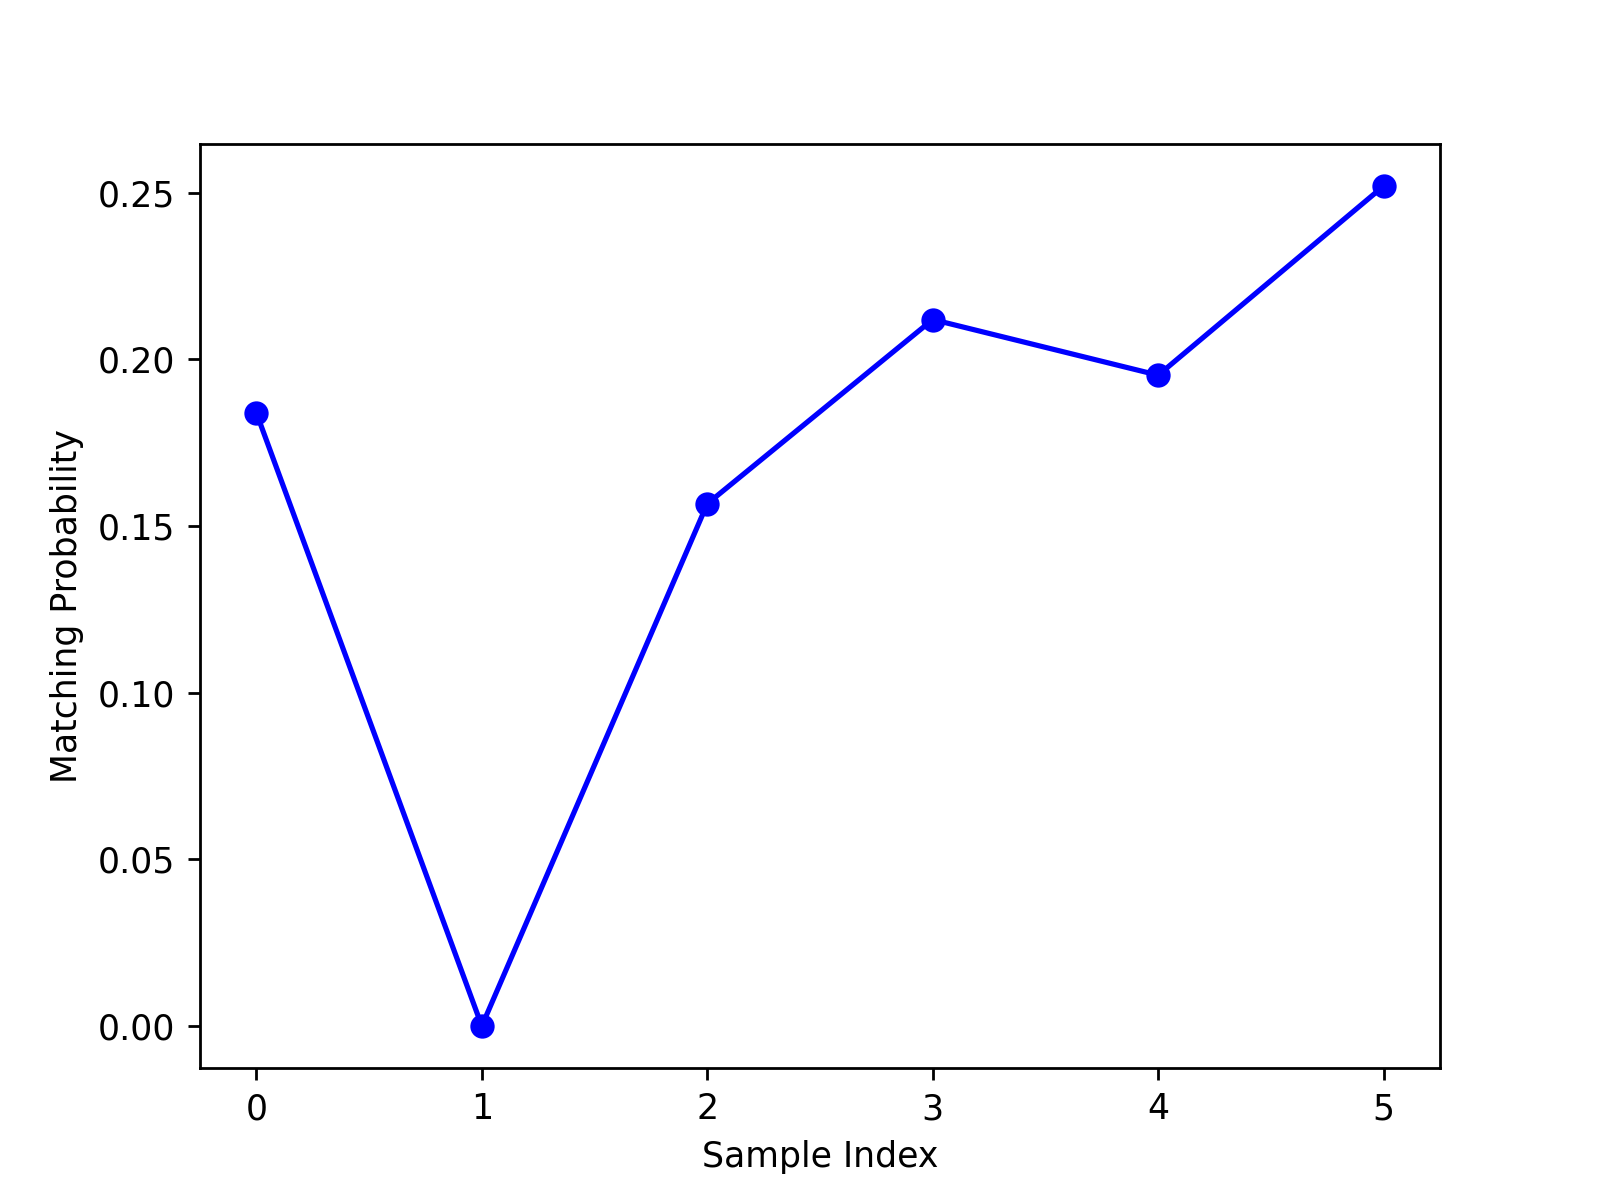

In [8]:
N_query = 1

fig, ax = plt.subplots()
ax.plot(K1_norm[N_query,:], '-o', c='blue')
ax.set_ylabel('Matching Probability')
ax.set_xlabel('Sample Index');

### Encoding to Decoding and backwards

In [9]:
# vector2 =  vectorizer.transform(text1)
# v2= vector2.toarray().ravel()

# print(text1)

# for j in range(v2.shape[0]):


#     if v2[j]!=0:
#         for i in range(v2[j]):
#             print(list(vocc.keys())[list(vocc.values()).index(j)])